In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv("train.csv")
train.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Saleprice
0,1,18.144573,13.833054,7,3.991517,2003,2003,19.433175,144.117862,0.0,...,0,0,1,0,0,0,0,1,0,208501.0
1,2,20.673625,14.117918,6,6.000033,1976,1976,54.598150,181.719186,0.0,...,0,0,1,0,0,0,0,1,0,181501.0
2,3,18.668047,14.476512,7,3.991517,2001,2002,17.768840,110.441033,0.0,...,0,0,1,0,0,0,0,1,0,223501.0
3,4,17.249651,14.106196,7,3.991517,1915,1970,54.598150,61.795315,0.0,...,0,0,1,1,0,0,0,0,0,140001.0
4,5,21.314283,15.022008,8,3.991517,2000,2000,25.404164,136.624601,0.0,...,0,0,1,0,0,0,0,1,0,250001.0


In [5]:
test = pd.read_csv("test.csv")
test.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20.673625,14.550687,5,4.679501,1961,1961,54.598150,107.505912,7.760721,...,0,0,0,1,0,0,0,0,1,0
1,1462,20.834996,15.023149,6,4.679501,1958,1958,14.642918,174.393644,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,1463,19.687482,14.950918,5,3.991517,1997,1998,54.598150,156.263694,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,1464,20.348384,14.204772,6,4.679501,1998,1998,6.157403,128.653472,0.000000,...,0,0,0,1,0,0,0,0,1,0
4,1465,13.949261,12.696875,8,3.991517,1992,1992,54.598150,71.179547,0.000000,...,0,0,0,1,0,0,0,0,1,0


# simple linear regression from scratch

In [7]:
#find the most correlated feature with saleprice
newdict = train[train.columns[1:]].corr()['Saleprice'][:378]
newdict.max()

0.7957742674249441

In [9]:
print(np.corrcoef(train['OverallQual'], train['Saleprice']))

[[1.         0.79577427]
 [0.79577427 1.        ]]


In [10]:
trainSimpleX = train.OverallQual
trainSimpleY = train.Saleprice

In [11]:
trainSimpleX

0       7
1       6
2       7
3       7
4       8
       ..
1453    6
1454    6
1455    7
1456    5
1457    5
Name: OverallQual, Length: 1458, dtype: int64

In [12]:
trainSimpleY

0       208501.0
1       181501.0
2       223501.0
3       140001.0
4       250001.0
          ...   
1453    175001.0
1454    210001.0
1455    266501.0
1456    142126.0
1457    147501.0
Name: Saleprice, Length: 1458, dtype: float64

In [13]:
#find mean
sumX = 0
for i in range(0 , trainSimpleY.count()):
    sumX += trainSimpleY[i]
MEAN = sumX / trainSimpleY.count()
MEAN

180933.91906721535

In [14]:
#find median
median = 0
if((trainSimpleY.count()) % 2 != 0):
    median = trainSimpleY[((trainSimpleY.count()-1)+1)/2]
else:
    median = trainSimpleY[(trainSimpleY.count()/2)-1] + trainSimpleY[((trainSimpleY.count()/2))]
    median = median / 2 
median

169750.99999999983

In [16]:
trainSimpleY.max()

755000.9999999999

In [17]:
trainSimpleY.min()

34900.999999999905

In [18]:
trainSimpleY.describe()

count      1458.000000
mean     180933.919067
std       79495.055285
min       34901.000000
25%      129926.000000
50%      163001.000000
75%      214001.000000
max      755001.000000
Name: Saleprice, dtype: float64

In [19]:
counts = []
counts.append(list(trainSimpleX).count(1))
counts.append(list(trainSimpleX).count(2))
counts.append(list(trainSimpleX).count(3))
counts.append(list(trainSimpleX).count(4))
counts.append(list(trainSimpleX).count(5))
counts.append(list(trainSimpleX).count(6))
counts.append(list(trainSimpleX).count(7))
counts.append(list(trainSimpleX).count(8))
counts.append(list(trainSimpleX).count(9))
counts.append(list(trainSimpleX).count(10))
counts

[2, 3, 20, 116, 397, 374, 319, 168, 43, 16]

In [20]:
mylist = list(dict.fromkeys(trainSimpleX))
mylist.sort()
mylist

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

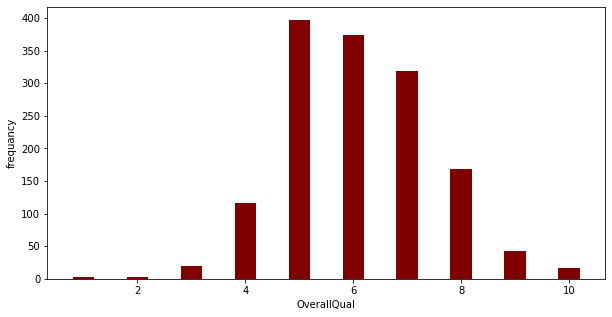

In [24]:
values = list(mylist)
count = list(counts)
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(values, count, color ='maroon',
        width = 0.4)
 
plt.xlabel("OverallQual")
plt.ylabel("frequancy")
plt.show()

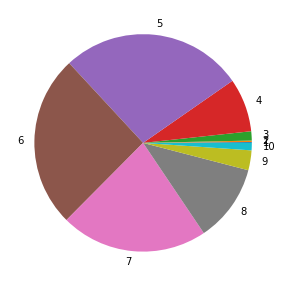

In [29]:
fig = plt.figure(figsize = (10, 5))
plt.pie(counts, labels = values)

plt.show() 

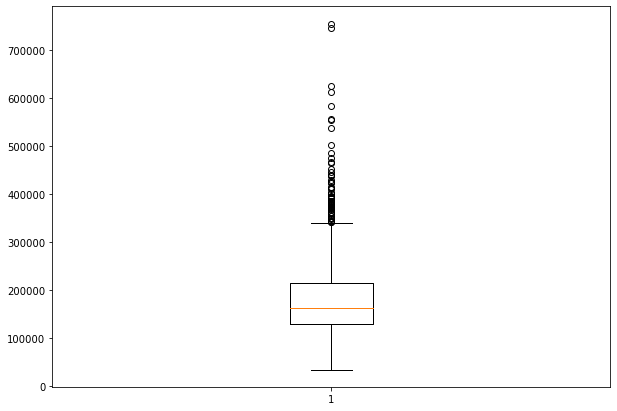

In [30]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(trainSimpleY)
 
# show plot
plt.show()

In [74]:
percent25 = trainSimpleY.quantile(0.25)
percent75 = trainSimpleY.quantile(0.75)
iqr = percent75 - percent25

In [75]:
upper_limit = percent75 + 1.5 * iqr
lower_limit = percent25 - 1.5 * iqr

In [38]:
Y = list(trainSimpleY)
X = list(trainSimpleX)

In [49]:
outliers = []
for i in range(0 , len(Y)):
    if (Y[i] < lower_limit) or (Y[i] > upper_limit):
        outliers.append(Y[i])

In [50]:
for i in outliers:
    Y.remove(i)

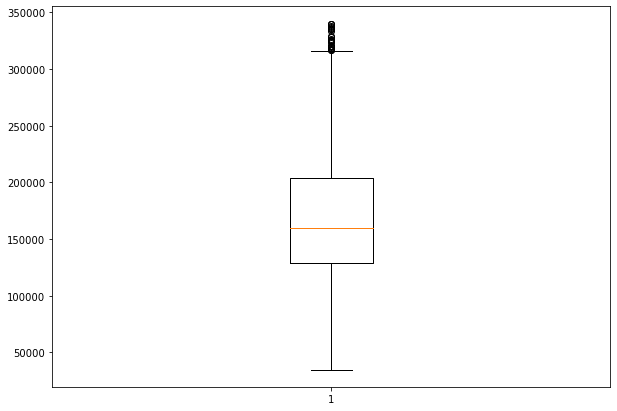

In [51]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(Y)
 
# show plot
plt.show()

In [60]:
df = pd.DataFrame()
df['y'] = Y
df['X'] = X[0:1397]
X = df['X']
Y = df['y']


In [62]:
#find z-index for every entry in x
zx = []
m = 0
for i in X :
    zx.append((X[m]-X.mean())/X.std())
    m+=1

In [61]:
#find z-index for every entry in y

zy = []
m = 0
for i in Y :
    zy.append((Y[m]-Y.mean())/Y.std())
    m+=1

In [73]:
#find r (correlation)
m = 0
rf = 0
for i in X :
    rf += (zx[m]*zy[m])
    m+=1
r = rf/(len(X)-1)

In [64]:
b1 = r * (Y.std()/X.std())
print(b1)
b0 = Y.mean() - (b1 * X.mean())
print(b0)

469.3708771232412
167371.80342530832


In [76]:
#predict if x = 6
y = b0 + (b1 * 6)
print(y)

170188.02868804775


## we found that simple linear regression worked but it's not logic that we will find the house price by only haspool feature so we will build multiple linear regression model with sklearn

In [75]:
model = LinearRegression()

In [76]:
trainx = pd.DataFrame(train)
trainy = np.array(train.Saleprice)
trainx.drop("Saleprice", axis=1, inplace=True)

In [77]:
model.fit(trainx , trainy)

LinearRegression()

### predict with test dataset (first row only)

In [78]:
test = pd.read_csv("test.csv")
test

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20.673625,14.550687,5,4.679501,1961,1961,54.598150,107.505912,7.760721,...,0,0,0,1,0,0,0,0,1,0
1,1462,20.834996,15.023149,6,4.679501,1958,1958,14.642918,174.393644,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,1463,19.687482,14.950918,5,3.991517,1997,1998,54.598150,156.263694,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,1464,20.348384,14.204772,6,4.679501,1998,1998,6.157403,128.653472,0.000000,...,0,0,0,1,0,0,0,0,1,0
4,1465,13.949261,12.696875,8,3.991517,1992,1992,54.598150,71.179547,0.000000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,8.726308,10.765922,4,5.348041,1970,1970,54.598150,665.141633,0.000000,...,0,0,0,1,0,0,0,0,1,0
1455,2916,8.726308,10.723223,4,3.991517,1970,1970,54.598150,69.030589,0.000000,...,0,0,0,1,1,0,0,0,0,0
1456,2917,31.755371,15.820339,5,5.348041,1960,1996,54.598150,213.123315,0.000000,...,0,0,0,1,1,0,0,0,0,0
1457,2918,17.611139,14.307159,5,3.991517,1992,1992,54.598150,85.016479,0.000000,...,0,0,0,1,0,0,0,0,1,0


In [79]:
model.predict(test.loc[0,:].to_numpy().reshape(1,-1))

array([128988.21503067])

In [83]:
import random
sample = list()
for i in range(0 , 30):
    sample.append(random.choice(X))
    
sample

[6,
 5,
 6,
 5,
 8,
 5,
 8,
 7,
 6,
 5,
 6,
 7,
 4,
 4,
 7,
 7,
 6,
 5,
 8,
 5,
 7,
 7,
 5,
 5,
 8,
 8,
 7,
 5,
 3,
 4]

In [88]:
sample_mean = sum(sample) / len(sample)
n = len(sample)
population_sd = df['X'].std()
#assume that confidence interval 96%
alpha = 1 - 0.96
#z of 0.02
z = 2.05

In [90]:
import numpy as np
np.sqrt(n)

5.477225575051661

In [91]:
before_mean = sample_mean - (z * (population_sd / np.sqrt(n)))
after_mean = sample_mean + (z * (population_sd / np.sqrt(n)))

In [94]:
print("population mean between "+ str(before_mean) + " And " + str(after_mean))

population mean between 5.450219907208536 And 6.483113426124797
